#MLP "y = x ^ 2
Training a MLP Neural Network for function approximation. Using this network and predict the F(x) = x^2 , then compare the output of the network with the results of the function F(x) and plot the comparison for the data in range of x ∈ [-3, 3].

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation
from tensorflow.keras.layers import Dropout

from keras.utils import np_utils, to_categorical

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
x = np.asarray([i for i in np.linspace(-3, 3, 100)])
y = np.asarray([i**2.0 for i in x])

x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))

scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)

scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)

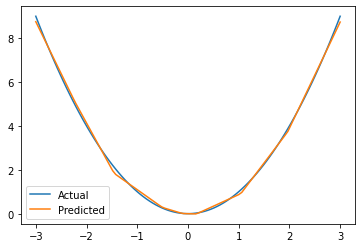

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=1, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(x, y, epochs=500, batch_size=10, verbose=0)

yresult = model.predict(x)

x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
y_result_plot = scale_y.inverse_transform(yresult)

plt.plot(x_plot,y_plot, label='Actual')

plt.plot(x_plot,y_result_plot, label='Predicted')
plt.legend()
plt.show()


#RBF "y = x^2"
Training an RBF(Radial Basis Function) Neural Network for function approximation. Using this network and predict the F(x) = x^2 , then compare the output of the network with the results of the function F(x) and plot the comparison for the data in range of x ∈ [-3, 3].

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
class RBF :
     def __init__(self, input_dim, output_dim, centers_number , beta = 0.5):
        self.input_dim = input_dim
        self.hidden_dim = output_dim
        self.centers_number = centers_number
        self.center  = [random.uniform(-3, 3) for i in range(self.centers_number)]
        self.weight = []
        self.beta = beta

     def activation_function(self, center, data):
         return np.exp(-self.beta * np.linalg.norm(center-data)**2)
     
     def calculate_matrix (self, x):
         matrix = np.zeros((len(x), self.centers_number))
         for index_data, data in enumerate(x) :
             for index_center, center in enumerate(self.center) :
                 matrix[index_data, index_center] = self.activation_function(center, data)
         return matrix        

     def train(self, x, y):
         phi = self.calculate_matrix(x)
         self.weight = np.dot(np.linalg.pinv(phi), y)
         
     def validation(self, x):
         matrix = self.calculate_matrix(x)
         prediction = np.dot(matrix, self.weight)
         return prediction


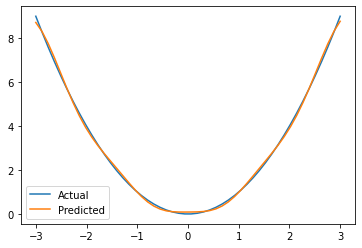

In [ ]:
x_train = np.linspace(-3, 3, 50)
y_train = np.power(x_train, 2)

rbf = RBF(1, 1, 10)
rbf.train(x_train, y_train)
predict = rbf.train(x_train, y_train)

plt.plot(x_train, y_train, label='Actual')

plt.plot(x_train,predict, label='Predicted')
plt.legend()
plt.show()